In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import warnings

from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sqlalchemy import create_engine
from sqlalchemy import create_engine
from sklearn import linear_model
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("trainh.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


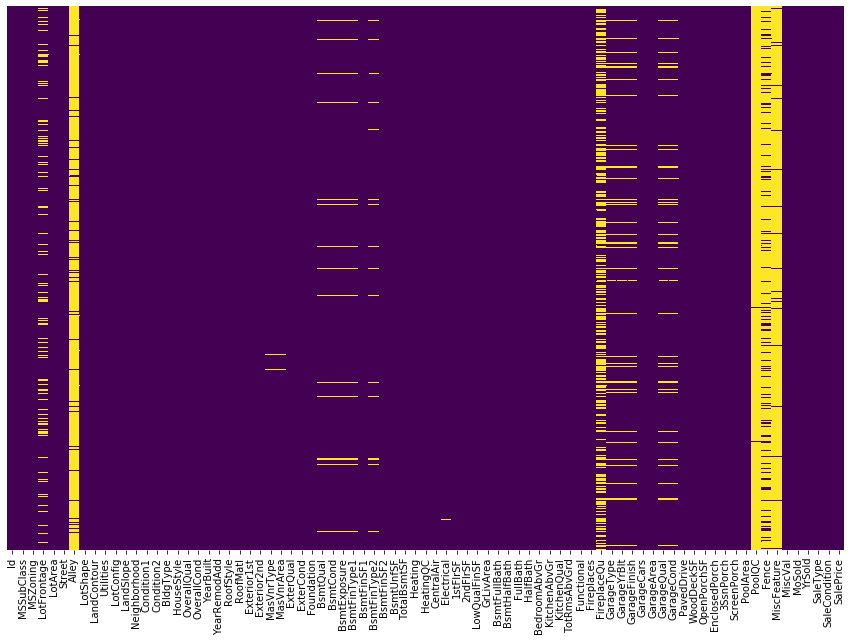

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [18]:
df = df.drop([ 'PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu', 'PoolQC', 'MiscFeature'], axis = 1)

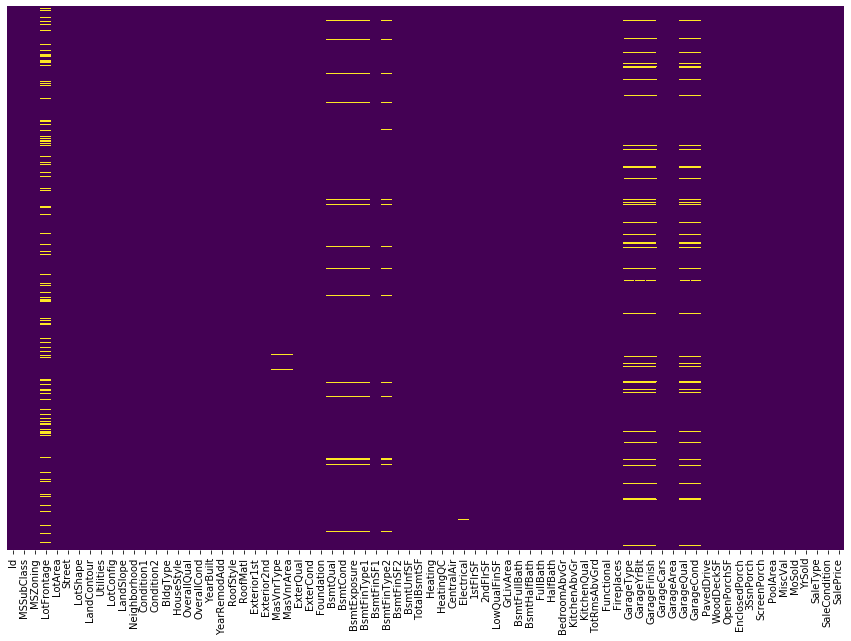

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [26]:
all_col = ['LotFrontage','GarageType','GarageYrBlt',
         'GarageFinish','GarageQual','GarageCond',
        'Electrical','BsmtFinType2',
         'BsmtQual','BsmtCond','BsmtExposure',
         'BsmtFinType1']

for i in range(len(all_col)):
    x = type(i)
    i+=1
    print(x)

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [20]:
df['LotFrontage'].isnull().sum()*100/df['LotFrontage'].isnull().count()

17.73972602739726

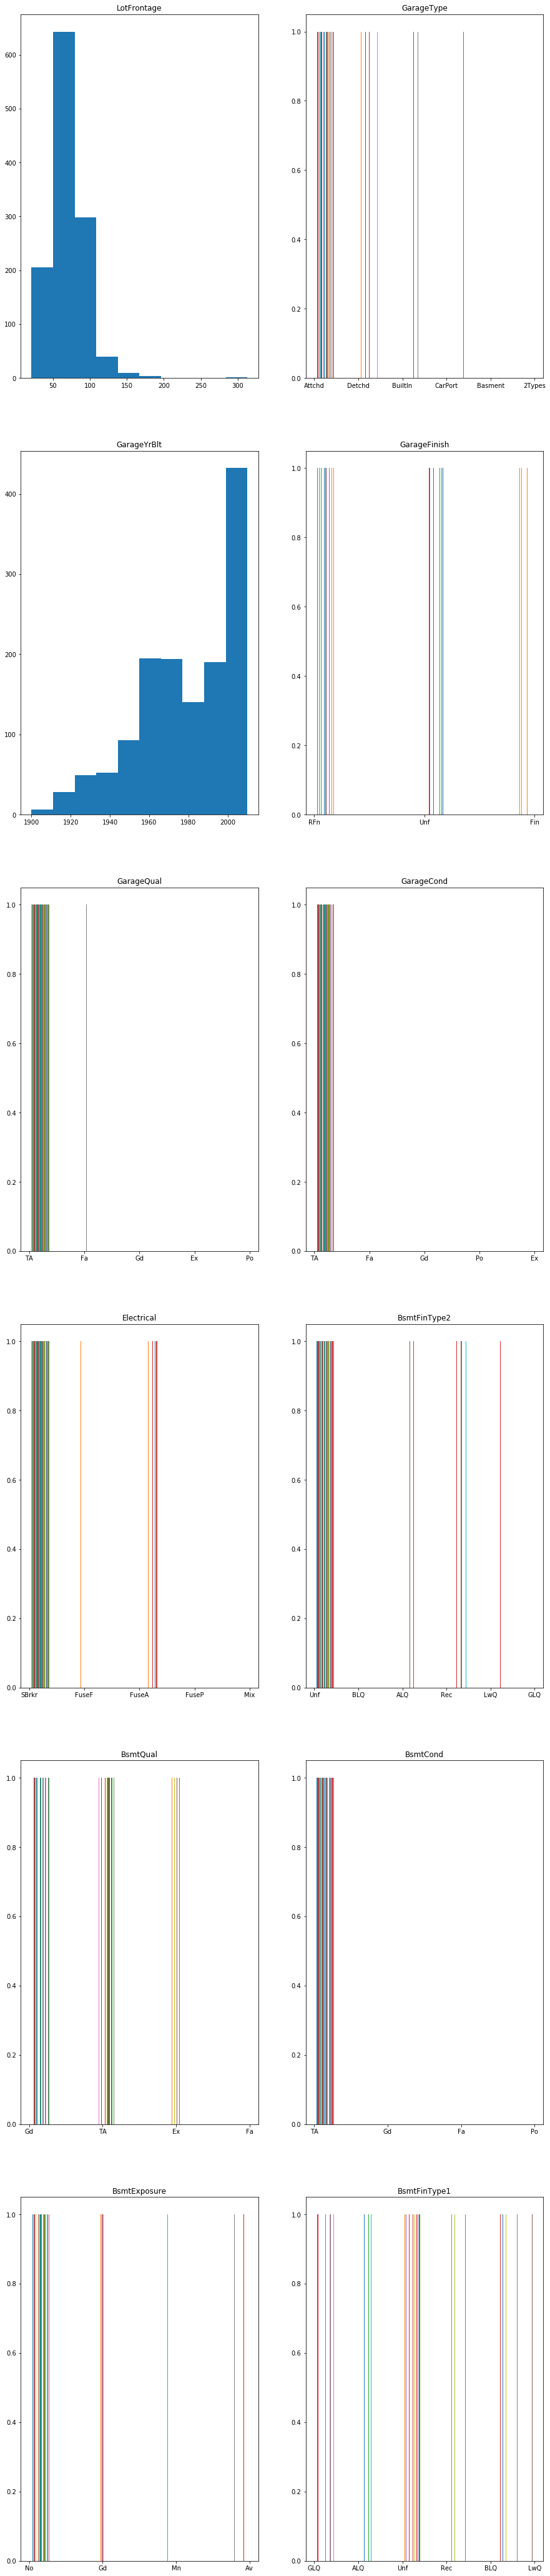

In [25]:
all_col = ['LotFrontage','GarageType','GarageYrBlt',
         'GarageFinish','GarageQual','GarageCond',
        'Electrical','BsmtFinType2',
         'BsmtQual','BsmtCond','BsmtExposure',
         'BsmtFinType1']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(6,2,i+1)
    plt.hist(df[all_col[i]])
    plt.title(all_col[i])

plt.show()

In [ ]:
plt.hist(df['LotFrontage'])
plt.show()

In [28]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

In [29]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean(), inplace=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179700,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.179700,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [33]:
df.dropna(inplace=True)

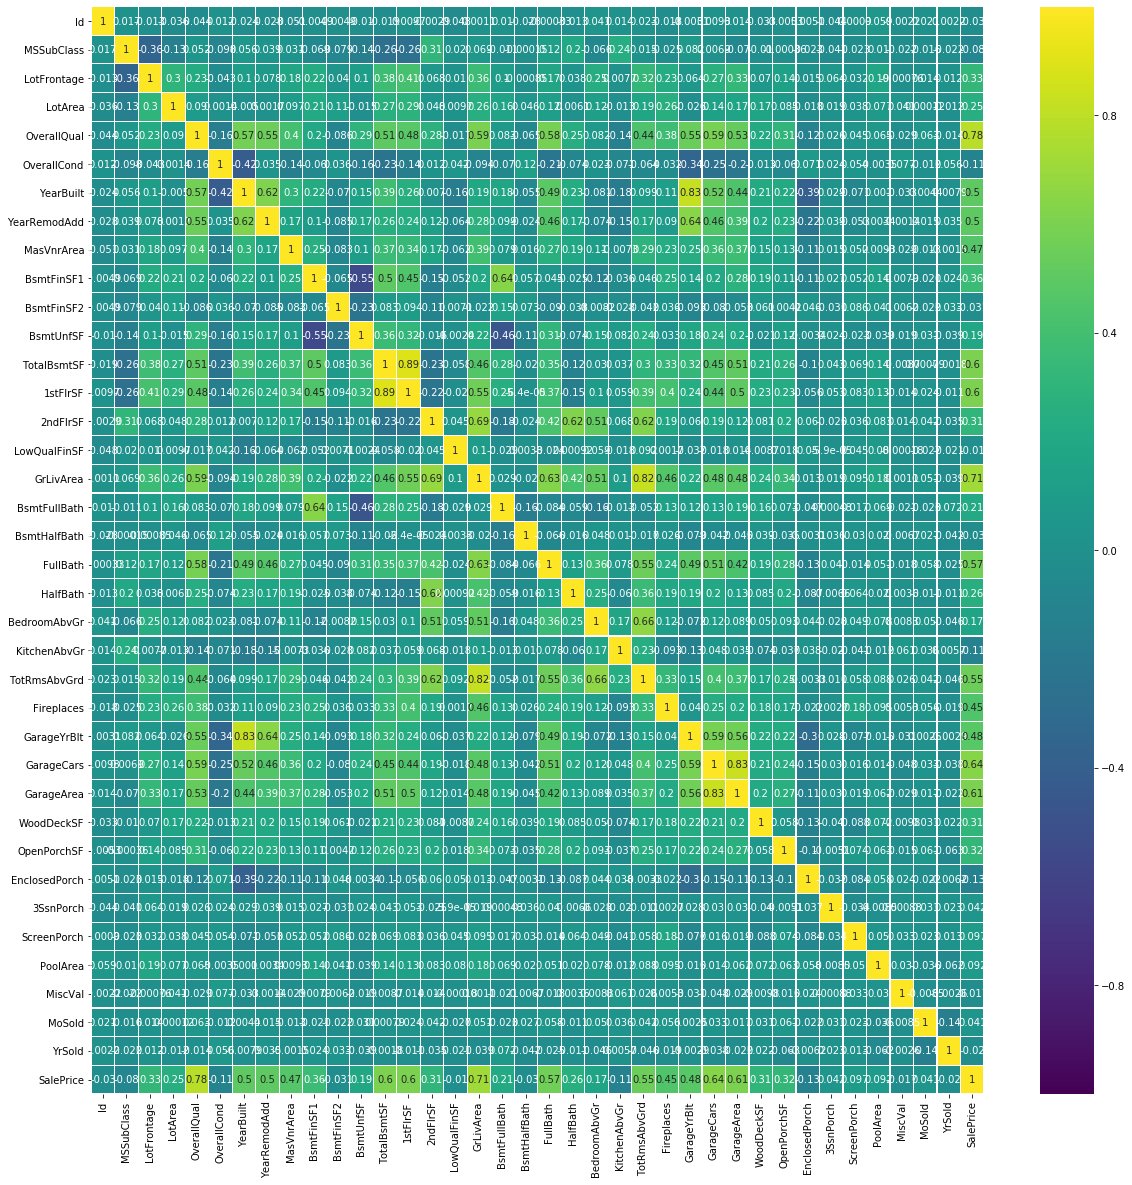

In [35]:
df_kor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [36]:
Y=df["SalePrice"]
X=df[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", 'GarageCars', 'GarageArea']]

regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
X=sm.add_constant(X)
sonuc=sm.OLS(Y, X).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     683.5
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:20:38   Log-Likelihood:                -16045.
No. Observations:                1338   AIC:                         3.210e+04
Df Residuals:                    1331   BIC:                         3.214e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.154e+05   5301.567    -21.758      0.000   -1.26e+05   -1.05e+05
OverallQual   2.49e+04   1152.008     21.617      0.000    2.26e+04    2.72e+04
TotalBsmtSF    28.4935      6.163      4.623      0.000      16.403      40.584
1stFlrSF        5.6823      6.643      0.855      0.392      -7.349      18.714
GrLivArea      44.5297      2.864     15.547      0.000      38.911      50.148
GarageCars   1.679e+04   3222.711      5.209      0.000    1.05e+04    2.31e+04
GarageArea     18.8032     10.791      1.742      0.082      -2.367      39.973
==============================================================================
Omnibus:                      469.114   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43703.049
Skew:                          -0.646   Prob(JB):                         0.00
Kurtosis:                      30.969   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
print("SalePrice= {:.3f} +\n {:.3f} OverallQual +\n {:.3f} TotalBsmtSF +\n {:.3f} 1stFlrSF +\n {:.3f} GrLivArea +\n {:.3f} GarageCars +\n {:.3f}  GarageArea +\n"
      .format(regr.intercept_, regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3], regr.coef_[4], regr.coef_[5]))

SalePrice= -115352.982 +
 24903.433 OverallQual +
 28.493 TotalBsmtSF +
 5.682 1stFlrSF +
 44.530 GrLivArea +
 16786.005 GarageCars +
 18.803  GarageArea +

